<a href="https://colab.research.google.com/github/DinalAdithya/Learning-PYTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PyTorch Workflow
topics = {1: "Data (prepare and load)",
          2: "Build model",
          3: "Fitting the model to data (tranning)",
          4: "Making prediction and evaluvating model(inference)",
          5: "Saving and loading model",
          6: "Putting it all together"}


In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

#Data (prepare and load)

Machine learning inlude 2 parts

1.   Get data into a numerical representation.
2.   Buil a model to learn patterns in taht numerical representation



In [3]:
# create known parameters
weight = 0.7
bias   = 0.3

# Create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze( dim=1 )
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(x),len(y)

(50, 50)

## Spliting data into traning and test sets (one of the most importent consept)

In [5]:
# Create a traning/test split

train_split = int(0.8 *len(x))
train_split

40

In [6]:
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualize our data

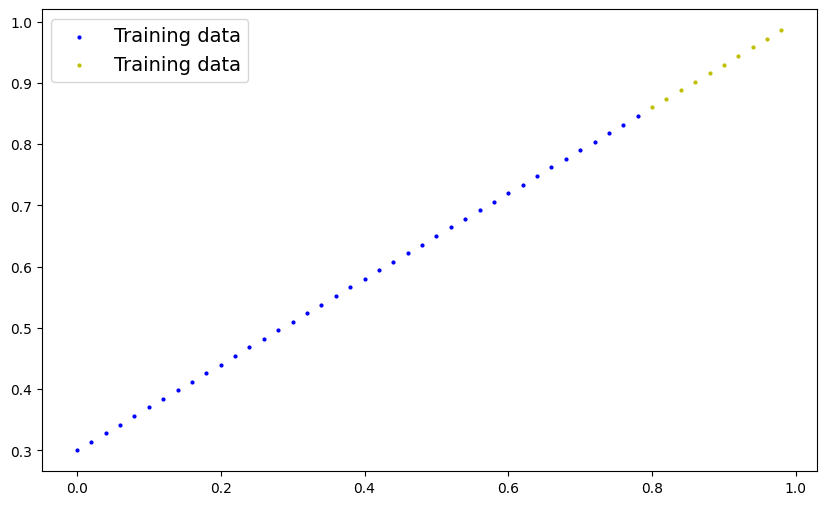

In [7]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     prediction = None):
  """
  plots training data, test data and compares predictions.

  """

  plt.figure(figsize=(10, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s= 4, label="Training data")

  #plot test data in yellow
  plt.scatter(test_data, test_labels, c = "y", s = 4, label="Training data")

  # Are there prediction?
  if prediction is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, prediction, c = "r", s = 4, label = "Predictions")

  # show the legend ( Show lables)
  plt.legend( prop = {"size" : 14} )

plot_predictions()

# Build Model

In [8]:
import torch
from torch import nn

# Create linear regresion model class

class LinearRegressionModel(nn.Module):
  # allmost everything in pytorch inheret from nn.module

  def __init__(self):
    super().__init__()

    # initialize model parameters
    self.weights = nn.Parameter(torch.randn( 1, #start ith random weights(this value wil change as the model learn)
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn( 1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is input data
    return self.weights * x + self.bias  # this is the linear regression formula



# Fitting the model to data

In [9]:
# Content of the model

## create a random seed (becouse these values are random if we didnt use seed every time the values will be diference)
torch.manual_seed(42)

## create intence of the model ( this is a subclass of nn.module )
model_0 = LinearRegressionModel()

## check out parameters
params = list(model_0.parameters())
print(params)


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [10]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
print(f"Ideal values of weight :", weight,"and bias :", bias)
# we need to get the move above random values to as close as these values
# most caces we dont know what even is the ideal values are

Ideal values of weight : 0.7 and bias : 0.3


## Extra


1. randn use becouse we need random numbers from normal distribution
2. if we use rand it will give us uniform distribution we dont use it here
3. choise between "randn" & "rand" depend on the spesicfic requirment of the model



In [12]:
# with out manual_seed()
torch.randn(1) , torch.randn(1) # this is defferent each time

(tensor([0.2345]), tensor([0.2303]))

In [13]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [14]:
torch.manual_seed(42) # but this is not different each time its the same
torch.randn(1)

tensor([0.3367])

In [15]:
torch.manual_seed(40) # acoding to the menual seed number
torch.randn(1)

tensor([0.9307])

# Making prediction and evaluvating model


1.   using torch.inference_mode() inference mode disables unnessesry thing for the prediction
2. we can do the same with torch.no_grad() but mostly use inference_mode()



In [16]:
# make the prediction with model
with torch.inference_mode(): # infreence is word for predictions that use in pytorch
  y_preds = model_0(x_test)
y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

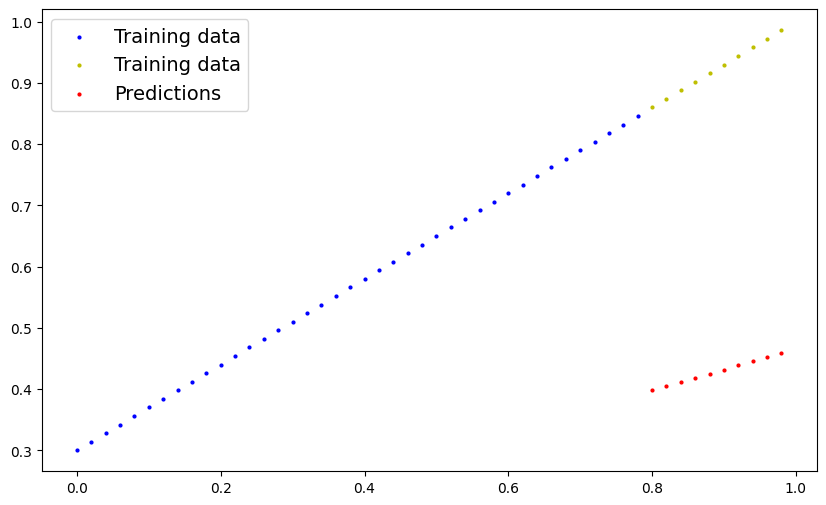

In [17]:
plot_predictions( prediction = y_preds )

## Train Model
1. Model should move from **unknown** parameters to **known** parameters

2. From poor represntation of the data to better representation


*Note: loss less function may call as cost or criterion function*



---

Things need to be train:

***Less function*** :  how worng your out put to ideal output

***Optimizer*** : Adjusts the model's parameters to imporve loss function

1.   lr(lerning rate) - the lr is a hyper parameter that defines how big/small the optimizer changes the parameters

2.   params - model parameter you'd like to optimize [ params = model_0.parameter() ]




---



For pytorch we need :

*   A training loop
*   A testing loop



In [18]:
# check out models parameters [ parameter is a value model sets it self ]
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
import torch
from torch import nn

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = lerning rate -> possibly the most important hyperparameter you can set


### Building a training loop (and a testin loop)

